# Regression

## Überblick

Das Ziel der Regressionsanalyse ist es Beziehungen zwischen Variablen zu finden. {numref}`fig-regression-example` zeigt ein Beispiel für die Beziehung von zwei Eigenschaften von Fahrzeugen mit Verbrennungsmotor: Dem Spritverbrauch und der Höchstgeschwindigkeit. In der Regel haben Fahrzeuge mit einer höheren Höchstgeschwindigkeit auch einen höheren Spritverbrauch. Mit einer Regression kann man diesen Zusammenhang basierend auf einer Stichprobe modellieren. 

```{figure} images/regression_example_german.png
---
width: 600px
name: fig-regression-example
---
Beziehung von Spritverbrauch und Höchstgeschwindigkeit
```

Etwas allgemeiner kann man Regression wie in {numref}`fig-regression-concept` darstellen. Wir haben Instanzen, deren Merkmale wir kennen. Bei der Regression spricht man statt Merkmalen auch von *unabhängigen Variablen*. Durch die Regression probiert man die Beziehung von den Merkmalen zu einer *abhängigen Variable* herzustellen, also den Wert an dem wir interessiert sind. In {numref}`fig-regression-concept` haben wir ein Merkmal $x$ und eine abhängige Variable $y$. Durch die Regression wird beschrieben, wie sich $y$ verändert, wenn sich $x$ verändert. Das Beispiel zeigt eine *Lineare Regression*, also die Regression von $y$ durch eine lineare Abbildung, was in zwei Dimensionen einer Gerade entspricht. 

```{figure} images/regression_concept_german.png
---
width: 600px
name: fig-regression-concept
---
Beziehung von Spritverbrauch und Höchstgeschwindigkeit
```

Formal haben wir eine Menge von Objekten $O = \{object_1, object_2, ...\}$ welche möglicherweise unendliche viele Elemente enthält. Außerdem haben wir eine Repräsentation der Objekte als Instanzen im Merkmalsraum $\mathcal{F} = \{\phi(o): o \in O\}$, wobei wir von numerischen Merkmalen ausgehen, also $\mathcal{F} \subseteq \mathbb{R}^m$. Für jedes Object, kennen wir außerdem die abhängige Variable $f^*(o) = y \in \mathbb{R}$. Das Ziel der Regression ist es eine Regressionsfunktion

$$f: \mathcal{F} \to \mathbb{R}$$

zu bestimmen so dass $f(\phi(o)) \approx f^*(o)$. Die Regressionsfunktion $f$ wird auch Regression von $y$ genannt. Die Problemstellung der Regression ist also ähnlich zur Klassifikation, nur dass es keine fest definierten Klassen gibt, sondern stattdessen ein numerischer Wert basierend auf den Merkmalen vorhergesagt werden soll. 

## Güte von Regressionen

Ähnlich wie bei der Klassifikation ist die Bewertung der Güte ein wichtiges Kriterim um eine gute Regressionsfunktion für eine abhängige Variable zu bestimmen. Wir diskutieren die Güte am Beispiel einer Linearen Regression von zwei Beispielen. 

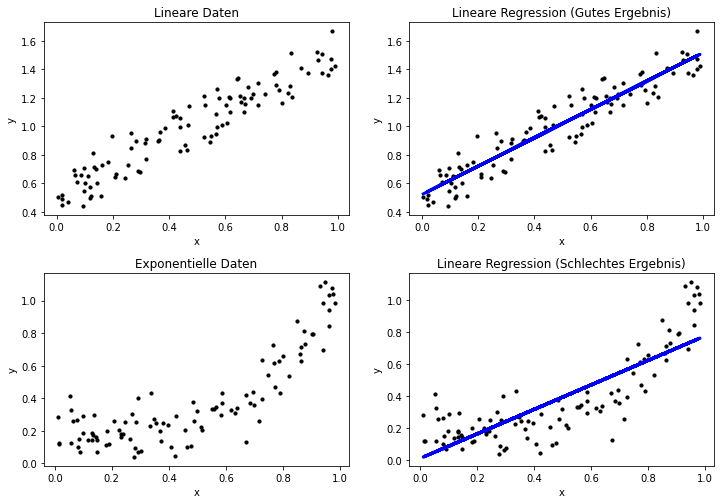

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(seed=0)
n = 100

# Linear data
X_lin = np.random.rand(n, 1)
Y_lin = X_lin+np.random.randn(n, 1)*0.1+0.5

# Train and predict
regr_lin = LinearRegression()
regr_lin.fit(X_lin, Y_lin)
Y_lin_pred = regr_lin.predict(X_lin)

# Exponential data
X_exp = np.random.rand(n, 1)
Y_exp = X_exp**4+np.random.randn(n, 1)*0.1+0.19

# Train and predict
regr_lin = LinearRegression()
regr_lin.fit(X_exp, Y_exp)
Y_exp_pred = regr_lin.predict(X_exp)

# Scatterplot
f, axes = plt.subplots(2, 2, figsize=(12, 7))

axes[0, 0].set_title('Lineare Daten')
axes[0, 0].scatter(X_lin, Y_lin,  color='black', s=10)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')

axes[0, 1].set_title('Lineare Regression (Gutes Ergebnis)')
axes[0, 1].scatter(X_lin, Y_lin,  color='black', s=10)
axes[0, 1].plot(X_lin, Y_lin_pred, color='blue', linewidth=3)
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')

axes[1, 0].set_title('Exponentielle Daten')
axes[1, 0].scatter(X_exp, Y_exp,  color='black', s=10)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')

axes[1, 1].set_title('Lineare Regression (Schlechtes Ergebnis)')
axes[1, 1].scatter(X_exp, Y_exp,  color='black', s=10)
axes[1, 1].plot(X_exp, Y_exp_pred, color='blue', linewidth=3)
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

Das erste Beispiel zeigt eine sehr gute Regression, wo die blaue Regressionsgerade sehr gut zu den Daten passt. Dies ist auch nicht verwunderlich, da wir die Daten mit Hilfe einer linearen Funktion generiert haben. Im zweiten Beispiel sieht man eine schlechte Regression, da die Regressionsgerade nicht gut zur eigentlichen Form der Daten passt. Auch dies ist nicht verwunderlich, da wir die Daten mit Hilfe der Exponentialfunktion generiert haben. Im Folgenden nennen wir das erste Beispiel einfach nur noch das "gute Ergebnis" und das zweite Beispiel das "schlechte Ergebnis". Bei der Regression nennt man dies auch guten, bzw. schlechten *Fit*, um zu betonen ob sich die Regression an die Form der Daten angepasst hat. 

### Visuelle Bewertung der Güte

In der obigen Abbildung zu unserem Beispiel konnten wir bereits die erste Methode zur Bewertung der Güte sehen: Man kann einfach die Daten als Scatterplot zusammen mit der Regression als Liniendiagram visualisieren. Hierdurch sieht man wie nah die Regression an den Daten liegt und ob sie ein gutes Ergebnis ist. Außerdem kann man auch systematische Fehler gut erkennen. Beim guten Ergebnis sehen wir, dass die Daten gleichmäßig um die blaue Gerade streuen, ohne das es eine sehr große Abweichung gibt. Man sieht also das die Regression zwar den Wert von $y$ nicht perfekt vorhersagt, aber die Abweichung ist gering und es gibt kein Muster in der Abweichung. Dies ist bei unserem schlechten Ergebnis anders. Zu Beginn sind die meisten Instanzen oberhalb der blauen Geraden, zwischen 0,4 und 0,7 sind alle Instanzen unterhalb der Geraden, und am Ende sind die meisten Instanzen wieder oberhalb der Geraden. Ein derariges Muster ist ein klarar Hinweis darauf, dass die Regression keine gute Beschreibung der Daten ist. Diese systematischen Fehler kann man auch bennen. Wenn der großteil der Instanzen unterhalb der Regressionsgerade liegt, nennt man dies auch *Overprediction*, da die Regression einen zu hohen Wert vorhersagt. Wenn der großteil der Instanzen oberhalb der Regressionsgeraden liegt, spricht man hingegen von *Underprediction*. 

Ein weitere Art sich die Ergebnisse der Regression graphisch aufzubereiten ist die Betrachtung der *Residuen* (engl. *residuals*). Das Residuum einer Instanz $x \in \mathcal{F}$ ist definiert als

$$e_x = f^*(x)-f(x) = y-f(x),$$

also die Abweichung der vorhersage vom wahren Wert. Durch die Visualisierung der der Residuen können wir also den Fehler der Regression für verschiedene Werte von $x$ darstellen. 

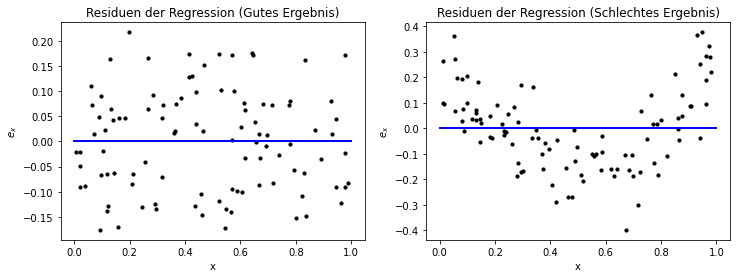

In [6]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Residuen der Regression (Gutes Ergebnis)')
axes[0].scatter(X_lin, Y_lin-Y_lin_pred,  color='black', s=10)
axes[0].plot([0, 1],[0,0] , color='blue', linewidth=2)
axes[0].set_xlabel('x')
axes[0].set_ylabel('$e_x$')

axes[1].set_title('Residuen der Regression (Schlechtes Ergebnis)')
axes[1].scatter(X_exp, Y_exp-Y_exp_pred,  color='black', s=10)
axes[1].plot([0, 1],[0,0] , color='blue', linewidth=2)
axes[1].set_xlabel('x')
axes[1].set_ylabel('$e_x$')

plt.show()

Die Residuen haben eine ähnliche Aussagekraft die direkte Darstellung der Regression und der Daten. Der Vorteil bei den Residuen ist jedoch, dass nur der Fehler dargestellt wird, so dass der Fokus klarer ist. Bei der Darstellung des guten Ergebnisses auf der linken Seite könnte man irrtümlicherweise vermuten, dass das Ergebnis schlecht ist, da die Punkte in der vollen Fläche der Darstellung streuen und nicht unbedingt nah an der blauen Geraden liegen, die einen Fehler von 0 markiert. Wenn man einen Blick auf die y-Achse wirft, erkennt man aber, dass das dass Ergebnis eigentlich sehr gut ist, da der Datenbereich einfach sehr klein ist. Auf der rechten Seite sieht man beim schlechten Ergebnis, dass der Datenbereich auf der y-Achse beinahe 20-mal so groß ist. Dies ist bereits der erste Indikator, dafür dass es ein schlechtes Ergebnis ist. Außerdem sieht man anhand der Residuen auch wieder gut das Muster aus Over- und Underprediction. 

Unsere bisherigen Analysen funktionieren zwar sehr gut, aber nur wenn es nur ein Merkmal gibt. Sobald es viele Merkmale gibt, kann man weder die Residuen, noch die Daten mit der Regression gut darstellen. Wir können jedoch eine andere Art der Darstellung der Fehler wählen, die unabhängig von der Anzahl der Merkmale ist. Die Grundidee ist ähnlich zur Confusion Matrix, die wir aus der [Kapitel 7](kapitel_07) kennen: Wir vergleichen die wahren Werte der abhängigen Variablen mit den Vorhersagen. 

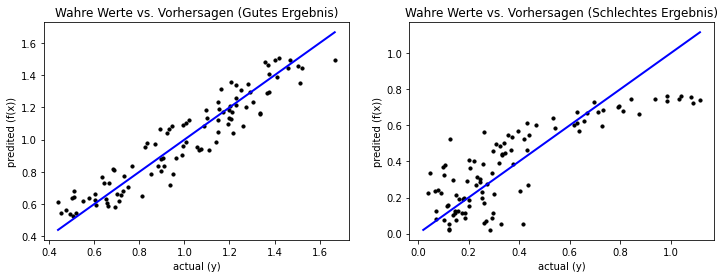

In [7]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Wahre Werte vs. Vorhersagen (Gutes Ergebnis)')
axes[0].scatter(Y_lin, Y_lin_pred,  color='black', s=10)
axes[0].plot([np.min(np.minimum(Y_lin, Y_lin_pred)), np.max(np.maximum(Y_lin, Y_lin_pred))],[np.min(np.minimum(Y_lin, Y_lin_pred)), np.max(np.maximum(Y_lin, Y_lin_pred))] , color='blue', linewidth=2)
axes[0].set_xlabel('actual (y)')
axes[0].set_ylabel('predited (f(x))')

axes[1].set_title('Wahre Werte vs. Vorhersagen (Schlechtes Ergebnis)')
axes[1].scatter(Y_exp, Y_exp_pred,  color='black', s=10)
axes[1].plot([np.min(np.minimum(Y_exp, Y_exp_pred)), np.max(np.maximum(Y_exp, Y_exp_pred))],[np.min(np.minimum(Y_exp, Y_exp_pred)), np.max(np.maximum(Y_exp, Y_exp_pred))] , color='blue', linewidth=2)
axes[1].set_xlabel('actual (y)')
axes[1].set_ylabel('predited (f(x))')

plt.show()

Im Idealfall entsprechen die Vorhersagen den wahren Werten. Dies ist in der Darstellung die blau markierte Diagonale. Je weiter die Instanzen von der Diagonalen entfernt sind, desto schlechter ist die Regression. Für ein gutes Ergebnis, sollten alle Instanzen relativ nah an der Diagonalen sein und es sollte kein Muster in der Streuung geben. Bei einem schlechten Ergebnis sind die Abweichungen größer und/oder es gibt Muster die auf systematische Fehler hindeuten. Beim schlechten Ergebnis beobachten wir beides. Zum seinen sehen die Werte kleiner als 0,35 nahezu zufällig aus und sind weit von der Diagonalen entfernt. Zum Anderen sehen wir wieder das gleiche Muster wie bisher auch. 

### Gütemaße

Es gibt auch Gütemaße für die Bewertung von Regressionen. Diese Gütemaße werden mit Hilfe der Residuen definiert. Sei hierfür $X = \{x_1, ..., x_n\} \subseteq \mathcal{F} \subseteq \mathbb{R}^m$ eine Stichprobe von Instanzen mit $m$ Merkmalen und $Y = \{y_i, ..., y_n\} \subseteq \mathbb{R}$ die Werte der dazugehörigen abhängigen Variable. {numref}`tbl-metrics-regression` listet die Definition von vier Gütemaßen. 

```{table} Gütemaße für Regressionen
:name: tbl-metrics-regression

| Gütemaß | Beschreibung | Definition |
|--------|-------------|------------|
| Mean Absolute Error | Das arithmetische Mittel der Residuen, also die absolute Abweichung der Vorhersagen von den erwarteten Werten. | $MAE = \frac{1}{n} \sum_{i=1}^n \vert e_{x_i} \vert$ |
| Mean Squared Error | Das arithmetische Mittel des Quadrats der Residuen. | $MSE = \frac{1}{n} \sum_{i=1}^n e_{x_i}^2$ |
| R Squared, R2, $R^2$ | Das *Bestimmitheitsmaß*, definiert als der Anteil der Varianz der Daten, der durch die Regression erklärt wird.  | $R^2 = 1 - \frac{\sum_{i=1}^n (y_i-f(x_i))^2}{\sum_{i=1}^n (y_i-mean(Y))^2}$
| Adjusted R Squared | Variante von $R^2$, die die Komplexität der Regression berücksichtigt. | $\bar{R}^2 = 1 - (1-R^2)\frac{n-1}{n-m-1}$ |
```

Die MAE misst die absolute Abweichung der Vorhersagen und erwarteten Werte. Die MSR ist ähnlich zu MAE, nutzt aber die quadratischen Distanzen. Da MSE die quadratischen Instanzen berücksichtigt, werden Ausreißer stärker bestraft als bei MAE. Sowohl MAE als auch MSE sind absolute Gütemaße und daher schwer zu interpretieren, da es keine festen Referenzpunkte gibt. Bei der Klassifikation waren die Gütemaße fast alle im Interval $[0,1]$ verteilt, so dass eindeutig klar war, was das beste und schlechsteste Ergebnis ist. Um MAE und MSE zu interpretieren braucht man detailiertes Wissen über die abhängige Variable, insbesondere über den Wertebereich und die praktische Relevanz von Abweichungen. 

In dieser Hinsicht ist $R^2$ ähnlicher zu den Gütemaßen für die Klassifikation: Die Werte liegen im Intervall $[0,1]$, wobei 1 der best mögliche Wert ist. Mit $R^2$ kann man die Frage beantworten, ob eine Regression besser ist als einfach nur das arithmetische Mittel der Daten als Schätzung von die abhängige Variable zu nutzen ohne die Merkmale zu betrachten. Die Summe im Zähler entspricht der Summe der quadrierten Residuen. Der Nenner betrachtet sozusagen auch Residuen, nur dass das arithmetische Mittel als Regression genommen wird. Würde man Zähler und Nennen noch durch $n$ Teilen, hätte man MSE als Zähler und die Varianz als Nenner. $R^2$ ist also das Verhältnis des MSE des Models zur Varianz der abhängigen Variable. Je kleine der MSR im Verhältnis zur Varianz, desto besser. Hierdurch berücksichtigt $R^2$ die Unsicherheit in den Daten. 

Eine schwäche von $R^2$ ist, dass Regressionen mit mehr Mermalen eigentlich immer besser werden. Dies kann jedoch zu Overfitting führen. Adjusted $R^2$ berücksichtigt daher die Anzahl der Merkmale. Wenn die Verbesserung von $R^2$ durch eine Verbessung des MSE kleiner ist die Bestrafung durch mehr merkmale, wird der Wert von $R^2$ kleiner. 

Betrachten wir jetzt die Werte unserer Gütemaße für unsere zwei Beispiele. 

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def adjusted_r2_score(Y, Y_pred, n_instances, n_features):
    return (1-(1-r2_score(Y, Y_pred))*(n_instances-1)/(n_instances-n_features-1))

print('Gütemaße (Gutes Ergebnis)')
print('MAE:         %.2f' % mean_absolute_error(Y_lin, Y_lin_pred))
print('MSE:         %.2f' % mean_squared_error(Y_lin, Y_lin_pred))
print('R2:          %.2f' % r2_score(Y_lin, Y_lin_pred))
print('Adjusted R2: %.2f' % adjusted_r2_score(Y_lin, Y_lin_pred, n, 1))
print()
print('Gütemaße (Schlechtes Ergebnis)')
print('MAE:         %.2f' % mean_absolute_error(Y_exp, Y_exp_pred))
print('MSE:         %.2f' % mean_squared_error(Y_exp, Y_exp_pred))
print('R2:          %.2f' % r2_score(Y_exp, Y_exp_pred))
print('Adjusted R2: %.2f' % adjusted_r2_score(Y_exp, Y_exp_pred, n, 1))

Gütemaße (Gutes Ergebnis)
MAE:         0.08
MSE:         0.01
R2:          0.89
Adjusted R2: 0.89

Gütemaße (Schlechtes Ergebnis)
MAE:         0.13
MSE:         0.03
R2:          0.68
Adjusted R2: 0.68


Da wir zufällige Daten generiert haben, können wir die Werte von MAE und MSE nicht bewerten. Ohne den Wertebereich und die bedeutung der abhängigen Variable zu kennen hilft ein Wert von $MAE=0,08$ nicht weiter, um zu verstehen wie gut eine Regression ist. Man erkennt ledigtlich, dass MAE und MSE beim guten Ergebnis niedriger sind als bem schlechten Ergebnis. Bitte beachten Sie, dass die Werte des MSE kleiner sind als bei MAE, da $x^2 < x$ für $x \in (0,1)$. Auch hier erkennt man wieder die Bedeutung des Wertebereichs für diese Gütemaße. 

Bei $R^2$ sehen wir das der Wert vom guten Ergebnis viel größer ist, als beim schlechten Ergebnis. Das schlechte Ergebnis erklärt nur etwa 2/3 der Varianz, während das gute Ergebnis was 90% erklärt. Bei Adjusted $R^2$ verhält es sich genauso, da es nur ein einzige Merkmal gibt. 

## Lineare Regression

Die Lineare Regression ist uns bereits in [Kapitel 7](kapitel_07) als Teil der Logistischen Regression begegnet, sowie im obigen Beispiel. Jetzt wollen wir die Lineare Regression genauer betrachten. Die Formel für die Regressionsfunktion der Linearen Regression ist

$$y = b_0 + b_1x_1 + ... + b_mx_m = b_0 + \sum_{i=1}^m b_ix_i$$

mit den *Koeffizienten* $b_1, ..., b_m \in \mathbb{R}$ und dem *Achsenabschnitt* (engl. *intercept*) $b_0$. Die Koeffizienten definieren den Einfluss der Merkmale auf die abhängige Variable.

The coefficients are closely related to the correlation between the dependent variable and the features. Usually, a positive coefficient means that the feature is positively correlated to the dependent variable, a negative coefficient means that there is a negative correlation. However, there are also exceptions to this general rule, as we will see in the next sections. 

The intercept is the "base value" of the dependent variable, i.e., the value of the dependent variable if all features would be zero. This concept can be visualized as the location where a regression line *intercepts* the axis of the coordinate system. 

The key aspect of Linear Regression is how the coefficients and intercept are determined, as this can affect not only the quality of the regression function, but also how the coefficients may be interpreted. 

### Ordinary Least Squares

The standard way to estimate the coefficients of Linear Regression is using the *Ordinary Least Squares* (OLS) method. For this, we interpret the instance as matrix and the dependent variables and coefficients as vectors:

$$
\begin{split}
X &= \begin{pmatrix}
x_{1,1} & \dots & x_{1,m} \\
\vdots & \ddots & \vdots \\
x_{n,1} & \dots & x_{n,m} 
\end{pmatrix} \\
y &= (y_1, \dots, y_n) \\
b &= (b_1, \dots, b_m)
\end{split}$$

Because of this, we can use matrix multiplication to calculate all the predictions given a set of coefficients as a single vector, i.e., 

$$f(X) = b_0 + Xb.$$

Since we want to minimize the residuals, we can formulate this as an optimization problem

$$\min ||f(X) - f^*(X)||_2^2 = \min ||b_0 + Xb - y||_2^2.$$

Hence, we minimize the square of the Euclidean norm (see [Chapter 6](06_Clustering.html#Measuring-Similarity)), in other words we are looking for the solution with the *least squares*.

Because we have more instances than features (otherwise we have too many features), there are usually multiple optimal solutions for this optimization problem. While these solutions are the same with respect to the OLS, there can be interesting effects if the features are correlated with each other. This can be demonstrated with an example. 

Consider two features $x_1, x_2$ and a dependent variable $y$ such that $y = x_1 = x_2$. Here are some examples for optimal solutions:

- Solution 1: $b_0 = 0, b_1=0.5, b_2=0.5$
- Solution 2: $b_0 = 0, b_1=1, b_2=0$
- Solution 3: $b_0 = 0, b_1=0, b_2=1$
- Solution 4: $b_0 = 0, b_1=10000, b_2=-9999$

In general, any solution with $b_0=0$ and $b_1+b_2=1$ is optimal. The first three solutions we listed seem reasonable. However, a solution with very large coefficients is also possible and optimal. This also demonstrates that the coefficients of features can be misleading in terms of correlation with the dependent variable. In the example above $b_1$ and $b_2$ can assume any real value and, thus indicate any possible correlation. 

### Ridge

In the following, we show how OLS can be modified with *regularization* to find the first three solutions and avoid the problems with correlated features. The idea of regularization is simple: when the optimization problem allows multiple solutions, some of which are more desirable than others, we modify the problem such that favorable solutions are better. This is done by adding a *regularization term* to the OLS formula. 

*Ridge* regularization is based on the idea that smaller values for coefficients are better than larger values. Thus, we should select the optimal solution that minimizes the values of the coefficients. To achieve this, the OLS problem is modified such that

$$\min ||b_0 + Xb - y||_2^2 + \alpha ||b||_2^2$$

where $\alpha \in \mathbb{R}, \alpha>0$ regulates the strength of the regularization term. To demonstrate the effect of this regularization, we calculate $||b||_2^2$ for the four solutions of our example above:

- Solution 1: $||b||_2^2 = \sqrt{0.5^2+0.5^2}^2 = 0.5$
- Solution 2/3: $||b||_2^2 = \sqrt{1^2+0^2}^2 = 1.0$
- Solution 4: $||b||_2^2 = \sqrt{10000^2+(-9999)^2}^2 = 199980001$

Thus, ridge would select the first solution.

### Lasso

Another commonly used regularization technique is *lasso*. While ridge leads to small coefficients, the correlated variables are still both non-zero. A model with similar performance, that uses fewer features is often better, because the likelihood of overfitting is reduced. The goal of lasso is to not only minimize the coefficient values of correlated variables, but to achieve that they become exactly zero. For this, the OLS problem is modified such that

$$\min ||b_0 + Xb - y||_2^2 + \alpha ||b||_1,$$

i.e., the difference to ridge is the norm that is used. Ridge uses the squared euclidean distance, whereas Lasso uses the Manhattan distance. When we look at the solutions, we get the following.

- Solution 1: $||b||_1 = |0.5|+|0.5| = 1.0$
- Solution 2/3: $||b||_1 = |1|+|0| = 1.0$
- Solution 4: $||b||_1 = |10000|+|-9999| = 19999.0$

Thus, Solutions 1, 2, and 3 would be optimal for lasso, which means it is likely that a solution is selected, where a coefficient is exactly zero. 

> Note:
> 
> We do not provide a detailed explanation of why Ridge only minimizes the values of the coefficients, while Lasso tries to find coefficients that are exactly zero, here. The short explanation is that the regularization term can also be considered as a constraint on the optimization problem. The shape of this constraint is a circle for Ridge and a diamond for Lasso, because that is the shape of the unit circles of the Euclidean and the Manhattan norm. Due to the diamond shape, values of exactly zero are likely with Lasso. A full explanation for this, can, e.g., be found [here](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b).

### Elastic Net

The last regularization variant is the *elastic net*. The elastic net combines ridge and lasso regularization and uses both the squared Euclidean norm and the Manhattan norm, i.e., 

$$\min ||b_0 + Xb - y||_2^2 + \rho \alpha ||b||_1 + \frac{1-\rho}{2}\alpha ||b||_2^2$$

where $\rho \in [0,1]$ defines the weighting between ridge and lasso. With $\rho=0$, the elastic net uses only ridge regularization, with $\rho=1$, the elastic net uses only lasso regularization. The goal of combining lasso and ridge is to enforce low coefficients, but ideally also try to reduce them to exactly zero, if possible.

### Impact of Regularization

We now revisit the Boston data, we already know from [Chapter 3](03_Data-Exploration) and create a Linear Regression for the data. We compare the results of OLS, Ridge, Lasso, and the Elastic Net. We use $\alpha=0.5$ as regularization strength and $\rho=0.25$ as ratio between Ridge and Lasso for the Elastic Net. The bar charts show how the coefficients change. 